# Learning Analytics & Educational Data Mining
Student performance is often used to assess quality of education. often, the metrics used to measure and/or predict student performance are the Cumulative Grade Point Average (CGPA) and internal assessments. some researches in the past have expanded the scope of metrics to include other apects about the students such as amount of time spent studying, distane travelled to get to school, family relations, free time they get and internet access. others have on a larger scope studied how students rated the structure and delivery of course content bu instructors as this plays abig role in their perfromance.Thi project attempts to improve educationl systems using the above-mentioned data. the project will make use of data science principles and machine learning models to identify attributes that have the most correlation t0 student perfromance and predict future performance based on these.

## The project seeks to answer the following questions:

    1. What are the factors affecting student achievements?
    2. Isit possible to predict intsructor performance
## Data Sets:
    [The Turkiye Student Evaluatin Data Set]: http://nrvis.com/data/mldata/turkiye-student-evaluation_R_Specific.csv
    [Student Performance Data Set] (https://www.kaggle.com/aljarah/xAPI-Edu-Data/download)

# Citation
``` python
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}
```

# Initial Setup

In [1]:
# Initial setup
# import the necessary libraries

import pandas as pd              # fro reading in data
import matplotlib.pyplot as plt  # for visualizations
import numpy as np               # for statistical calculations


# The Turkiye Data Set




## Loading the data set

In [2]:
# Load the Turkiye Student Evaluation Data Set into a Data Frame

# url for downloading the dataset
turkiye_df_url = "http://nrvis.com/data/mldata/turkiye-student-evaluation_R_Specific.csv"
#load the dataset into a dataframe using pandas
turkiye_df= pd.read_csv(turkiye_df_url)
print (turkiye_df.columns)
turkiye_df.head()
turkiye_df.tail()

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5816,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5817,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5818,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5820,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# check for missing/null values

turkiye_df.isnull().sum().sum()

0

In [4]:
turkiye_df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


# The student Performance Data Set

 This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful

In [72]:
# loading the data into a data frame 

dataset_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
student_mat_df = pd.read_csv(dataset_url, ";")
student_mat_df
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [69]:
student_mat_df.romantic


0       no
1       no
2       no
3      yes
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: romantic, Length: 395, dtype: object

In [8]:
student_mat_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [73]:
# encoding the string variables

student_mat_df["sex"] = np.where(student_mat_df["sex"].str.contains("M", "F"), 1, 0)
student_mat_df["address"] = np.where(student_mat_df["address"].str.contains("U", "R"), 1, 0)
student_mat_df["famsize"] = np.where(student_mat_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_mat_df["Pstatus"] = np.where(student_mat_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_mat_df["schoolsup"] = np.where(student_mat_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["famsup"] = np.where(student_mat_df["famsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["paid"] = np.where(student_mat_df["paid"].str.contains("yes", "no"), 1, 0)
student_mat_df["activities"] = np.where(student_mat_df["activities"].str.contains("yes", "no"), 1, 0)
student_mat_df["nursery"] = np.where(student_mat_df["nursery"].str.contains("yes", "no"), 1, 0)
student_mat_df["higher"] = np.where(student_mat_df["higher"].str.contains("yes", "no"), 1, 0)
student_mat_df["internet"] = np.where(student_mat_df["internet"].str.contains("yes", "no"), 1, 0)
student_mat_df["romantic"] = np.where(student_mat_df["romantic"].str.contains("yes", "no"), 1, 0)

In [9]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 
          'studytime', 'failures', 'famrel', 
          'goout', 'Dalc', 'Walc','health',
          'absences', 'G1', 'G2', 'G3']



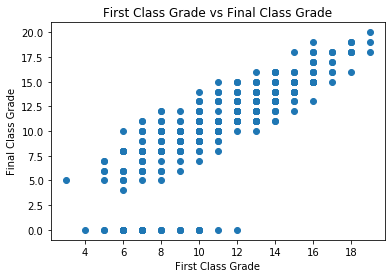

In [10]:
plt.scatter(student_mat_df.G1, student_mat_df.G3)
plt.title("First Class Grade vs Final Class Grade")
plt.xlabel ('First Class Grade')
plt.ylabel ('Final Class Grade')
plt.show()

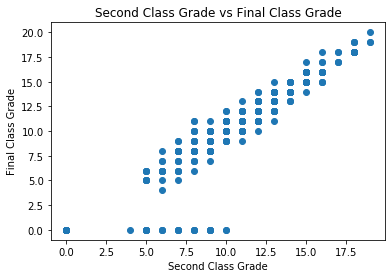

In [11]:
plt.scatter(student_mat_df.G2, student_mat_df.G3)
plt.title("Second Class Grade vs Final Class Grade")
plt.xlabel ("Second Class Grade")
plt.ylabel ('Final Class Grade')
plt.show()

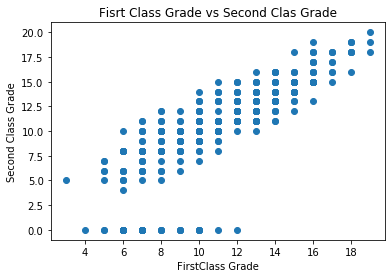

In [12]:
plt.scatter(student_mat_df.G1, student_mat_df.G3)
plt.title('Fisrt Class Grade vs Second Clas Grade')
plt.xlabel("FirstClass Grade")
plt.ylabel("Second Class Grade")
plt.show()

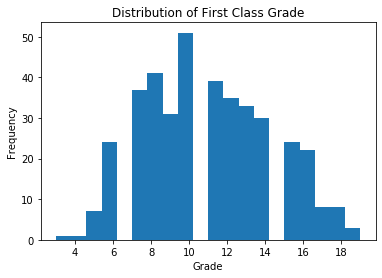

In [13]:
# Distribution of First Class Grade

plt.hist(student_mat_df.G1, bins=20)
plt.title('Distribution of First Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.hist(student_mat_df.internet, bins=20)
plt.title('Distribution of First Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

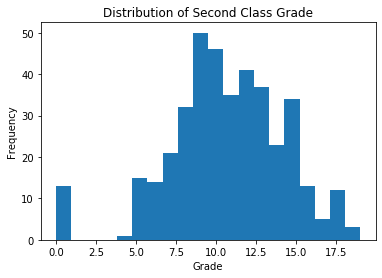

In [14]:
# Distribution of Second Class Grade

plt.hist(student_mat_df.G2, bins=20)
plt.title('Distribution of Second Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

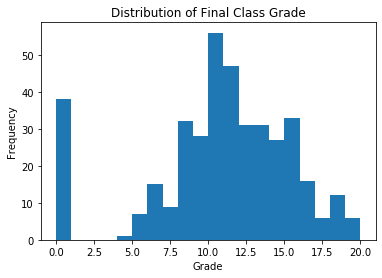

In [15]:
plt.hist(student_mat_df.G3, bins=20)
plt.title('Distribution of Final Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

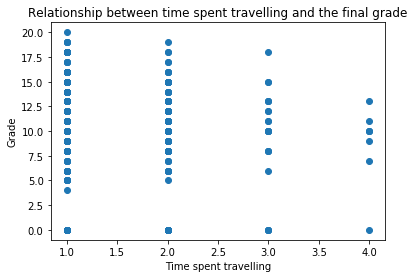

In [16]:
# Relationship between time spent travelling and the final grade

plt.scatter(student_mat_df.traveltime, student_mat_df.G3)
plt.title("Relationship between time spent travelling and the final grade")
plt.xlabel("Time spent travelling")
plt.ylabel("Grade")
plt.show()

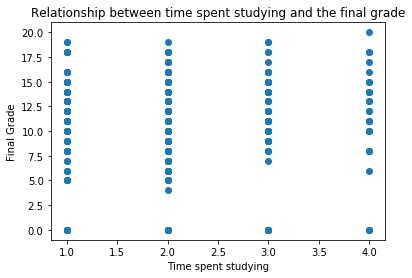

In [17]:
plt.scatter(student_mat_df.studytime, student_mat_df.G3)
plt.title("Relationship between time spent studying and the final grade")
plt.xlabel("Time spent studying")
plt.ylabel("Final Grade")
plt.show()

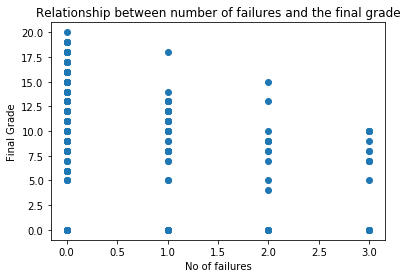

In [18]:
plt.scatter(student_mat_df.failures, student_mat_df.G3)
plt.title("Relationship between number of failures and the final grade")
plt.xlabel("No of failures")
plt.ylabel("Final Grade") 
plt.show()

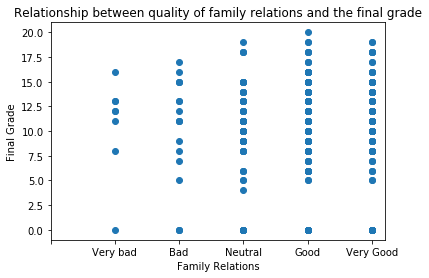

In [19]:
plt.scatter(student_mat_df.famrel, student_mat_df.G3)
plt.title("Relationship between quality of family relations and the final grade")
plt.xlabel("Family Relations")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))

plt.show()

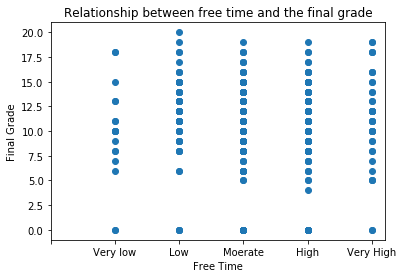

In [20]:
plt.scatter(student_mat_df.freetime, student_mat_df.G3)
plt.title("Relationship between free time and the final grade")
plt.xlabel("Free Time")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moerate', 'High', 'Very High'))

plt.show()

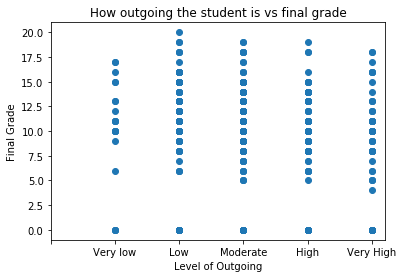

In [21]:
plt.scatter(student_mat_df.goout, student_mat_df.G3)
plt.title("How outgoing the student is vs final grade")
plt.xlabel("Level of Outgoing")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))

plt.show()

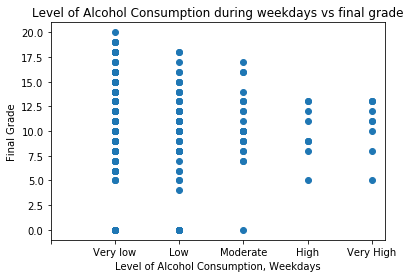

In [22]:
plt.scatter(student_mat_df.Dalc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekdays vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))

plt.show()

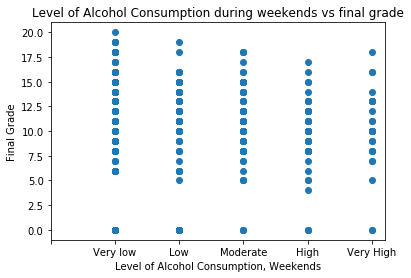

In [23]:
plt.scatter(student_mat_df.Walc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekends vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekends")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))

plt.show()

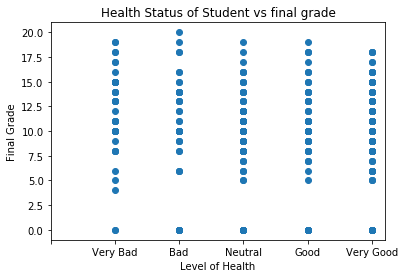

In [24]:
plt.scatter(student_mat_df.health, student_mat_df.G3)
plt.title("Health Status of Student vs final grade")
plt.xlabel("Level of Health")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))

plt.show()

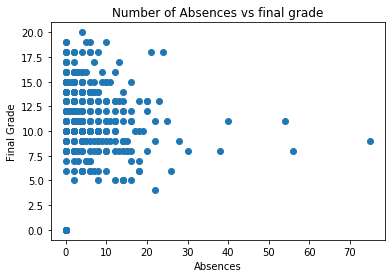

In [25]:
plt.scatter(student_mat_df.absences, student_mat_df.G3)
plt.title("Number of Absences vs final grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")

plt.show()

## Correlation Analysis

In [74]:
values = [2,6,7,12,14,13,23,24,25,26,27,28,29,30,31, 1,3,4,5,15,16,17,18,19,20,21,22]

from numpy import cov
for value in values:
    # calculate the covariance between two variables

    # calculate covariance matrix
    covariance = cov(student_mat_df.iloc[:, value], student_mat_df.G3)
    print(covariance)

[[ 1.62828504 -0.94461222]
 [-0.94461222 20.9896164 ]]
[[ 1.19844503  1.08909593]
 [ 1.08909593 20.9896164 ]]
[[ 1.18418043  0.76007839]
 [ 0.76007839 20.9896164 ]]
[[ 0.48651288 -0.37433657]
 [-0.37433657 20.9896164 ]]
[[ 0.55301677 -1.22793163]
 [-1.22793163 20.9896164 ]]
[[ 0.70432436  0.37611   ]
 [ 0.37611    20.9896164 ]]
[[ 0.80399666  0.21100045]
 [ 0.21100045 20.9896164 ]]
[[ 0.99772537  0.05174452]
 [ 0.05174452 20.9896164 ]]
[[ 1.23938829 -0.6772923 ]
 [-0.6772923  20.9896164 ]]
[[ 0.79342029 -0.22306111]
 [-0.22306111 20.9896164 ]]
[[ 1.65867763 -0.30646405]
 [-0.30646405 20.9896164 ]]
[[ 1.93294352 -0.3906766 ]
 [-0.3906766  20.9896164 ]]
[[64.04954058  1.25570263]
 [ 1.25570263 20.9896164 ]]
[[11.01705327 12.18768232]
 [12.18768232 20.9896164 ]]
[[14.1489173  15.59369659]
 [15.59369659 20.9896164 ]]
[[ 0.24992611  0.23695303]
 [ 0.23695303 20.9896164 ]]
[[ 0.17359121  0.20186982]
 [ 0.20186982 20.9896164 ]]
[[ 0.20583435  0.16920902]
 [ 0.16920902 20.9896164 ]]
[[ 0.09325

In [75]:
from scipy.stats import pearsonr
pearson = []
for value in values:
    corr, _ = pearsonr(student_mat_df.iloc[:, value], student_mat_df.G3)
    pearson.append(round(corr, 3))
print(pearson)

[-0.162, 0.217, 0.152, -0.117, -0.36, 0.098, 0.051, 0.011, -0.133, -0.055, -0.052, -0.061, 0.034, 0.801, 0.905, 0.103, 0.106, 0.081, -0.058, -0.083, -0.039, 0.102, 0.016, 0.052, 0.182, 0.098, -0.13]


In [76]:
from scipy.stats import spearmanr
spearman = []
for value in values:
    corrS, _ = spearmanr(student_mat_df.iloc[:, value], student_mat_df.G3)
    spearman.append(round(corrS, 3))
    print('Spearmans correlation: %.3f' % corrS)

Spearmans correlation: -0.173
Spearmans correlation: 0.225
Spearmans correlation: 0.170
Spearmans correlation: -0.121
Spearmans correlation: -0.361
Spearmans correlation: 0.105
Spearmans correlation: 0.055
Spearmans correlation: -0.005
Spearmans correlation: -0.166
Spearmans correlation: -0.121
Spearmans correlation: -0.104
Spearmans correlation: -0.048
Spearmans correlation: 0.018
Spearmans correlation: 0.878
Spearmans correlation: 0.957
Spearmans correlation: 0.103
Spearmans correlation: 0.119
Spearmans correlation: 0.066
Spearmans correlation: -0.044
Spearmans correlation: -0.151
Spearmans correlation: -0.050
Spearmans correlation: 0.061
Spearmans correlation: 0.026
Spearmans correlation: 0.032
Spearmans correlation: 0.172
Spearmans correlation: 0.108
Spearmans correlation: -0.091


for l in range(len(values)):
    pearson_corr[l][l] = cols[l-1]
    pearson_corr[l][l+1] = pearson[l-1]
print (pearson_corr)

In [120]:
# We first divide our data into attributes and labels:
X = student_mat_df.iloc[:, [2,6,7,12,14,13,23,24,25,26,27,28,29,30, 1,3,4,5,15,16,17,18,19,20,21,22]].values  # Independent/predictor variables
y = student_mat_df.iloc[:, 31].values    # Dependent/label variable

In [121]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
#X = student_mat_df.iloc[:, [2,6,7,12,14,13,23,24,25,26,27,28,29,30,1,3,4,5,15,16,17,18,19,20,21,22]].values
#y = student_mat_df.iloc[:, 31].values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	24
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	24
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	24
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	24
I

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size = 0.25, random_state = 0)

In [147]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter= 1000)
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB().fit(X_train, y_train)
random_classifier = RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=0)


logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)
random_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test) 
random_y_prediction = random_classifier.predict(X_test)

In [149]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_y_prediction, y_test))
print(accuracy_score(knn_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))
print(accuracy_score(random_y_prediction, y_test)) 

0.3434343434343434
0.26262626262626265
0.25252525252525254
0.23232323232323232
0.32323232323232326
0.3333333333333333


In [150]:
student_por_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv"
student_por_df = pd.read_csv(student_por_url, ';')
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [151]:
student_por_df.isnull().sum().sum()

0